In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Open the ECI results page
driver.get("https://results.eci.gov.in/PcResultGenJune2024/index.htm")

In [2]:
# Wait for the dropdown element to be clickable and click on it
dropdown = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]'))
)
dropdown.click()

# Select the desired state from the dropdown
state_option = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/main/div/section/div/div[2]/div[1]/div/div[1]/div/select"))
)
state_option.send_keys('Dadra & Nagar Haveli and Daman & Diu')
state_option.click()

In [3]:

# Wait for the link to the results to be clickable and click on it
c = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]/option[2]'))
) 
c.click()  

# Wait for the link to the results to be clickable and click on it
results_links = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '/html/body/main/div/div[2]/div[2]/ul/li[2]/a/img'))
)
results_links.click()

# Wait for the table containing the results to be visible
results_table = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((By.CLASS_NAME, "table-responsive"))
)

# Extract data from the table
rows = results_table.find_elements(By.TAG_NAME, "tr")
party_results = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_elements(By.TAG_NAME, "td")
    if cols:
        sn = cols[0].text.strip()
        c = cols[1].text.strip()
        p = cols[2].text.strip()
        evm = cols[3].text.strip()
        pv = cols[4].text.strip()
        tv = cols[5].text.strip()
        ov = cols[6].text.strip()
        party_results.append({'S.No': sn, 'Candidate': c, 'Party': p, 'EVM Votes': evm, 'Postal Votes': pv, 'Total Votes': tv, 'Percentage of votes': ov})
        
# Convert the results to a DataFrame
df = pd.DataFrame(party_results)

# Save the DataFrame to a CSV file
df.to_csv('Dadra & Nagar Haveli.csv', index=False)

In [4]:
# Go back to the main page to select the next state
driver.back()

# Go back to the main page to select the next state
driver.back()

# Wait for the link to the results to be clickable and click on it
c = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]/option[3]'))
) 
c.click()  

# Wait for the link to the results to be clickable and click on it
results_links = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '/html/body/main/div/div[2]/div[2]/ul/li[2]/a/img'))
)
results_links.click()

# Wait for the table containing the results to be visible
results_table = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((By.CLASS_NAME, "table-responsive"))
)

# Extract data from the table
rows = results_table.find_elements(By.TAG_NAME, "tr")
party_results = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_elements(By.TAG_NAME, "td")
    if cols:
        sn = cols[0].text.strip()
        c = cols[1].text.strip()
        p = cols[2].text.strip()
        evm = cols[3].text.strip()
        pv = cols[4].text.strip()
        tv = cols[5].text.strip()
        ov = cols[6].text.strip()
        party_results.append({'S.No': sn, 'Candidate': c, 'Party': p, 'EVM Votes': evm, 'Postal Votes': pv, 'Total Votes': tv, 'Percentage of votes': ov})
        
# Convert the results to a DataFrame
df = pd.DataFrame(party_results)

# Save the DataFrame to a CSV file
df.to_csv('Daman & Diu.csv', index=False)

In [5]:
# Close the WebDriver
driver.quit()

Data from Dadra & Nagar Haveli.csv:
   S.No                 Candidate                     Party  EVM Votes  \
0     1  DELKAR KALABEN MOHANBHAI    Bharatiya Janata Party     120833   
1     2     AJIT RAMJIBHAI MAHALA  Indian National Congress      63423   
2     3         KURADA DEEPAKBHAI      Bharat Adivasi Party      10188   
3     4        BORSA SANDIPBHAI S       Bahujan Samaj Party       3147   
4     5       SHAILESHBHAI VARTHA               Independent       2522   

   Postal Votes  Total Votes  Percentage of votes  
0           241       121074                58.89  
1            67        63490                30.88  
2             9        10197                 4.96  
3             5         3152                 1.53  
4             2         2524                 1.23  
Data from Daman & Diu.csv:
   S.No                 Candidate                     Party  EVM Votes  \
0     1  PATEL UMESHBHAI BABUBHAI               Independent      42469   
1     2   LALUBHAI BABUBHAI PATE

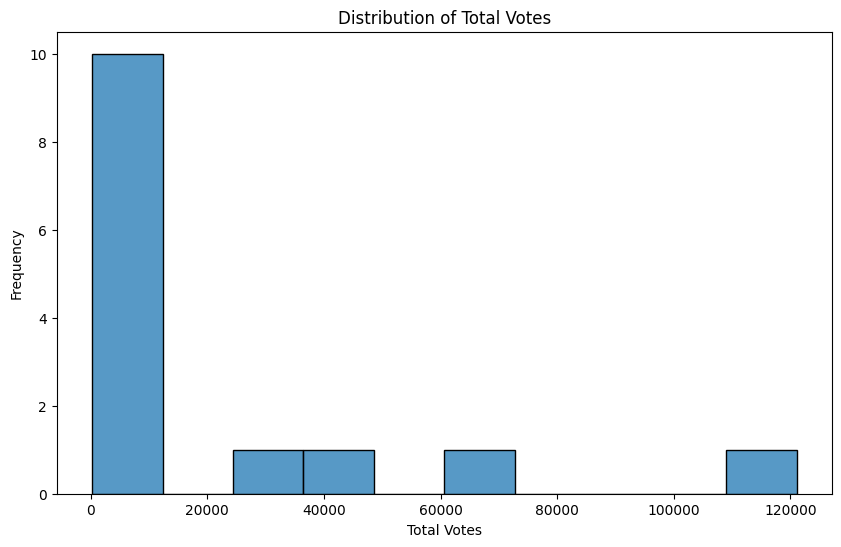

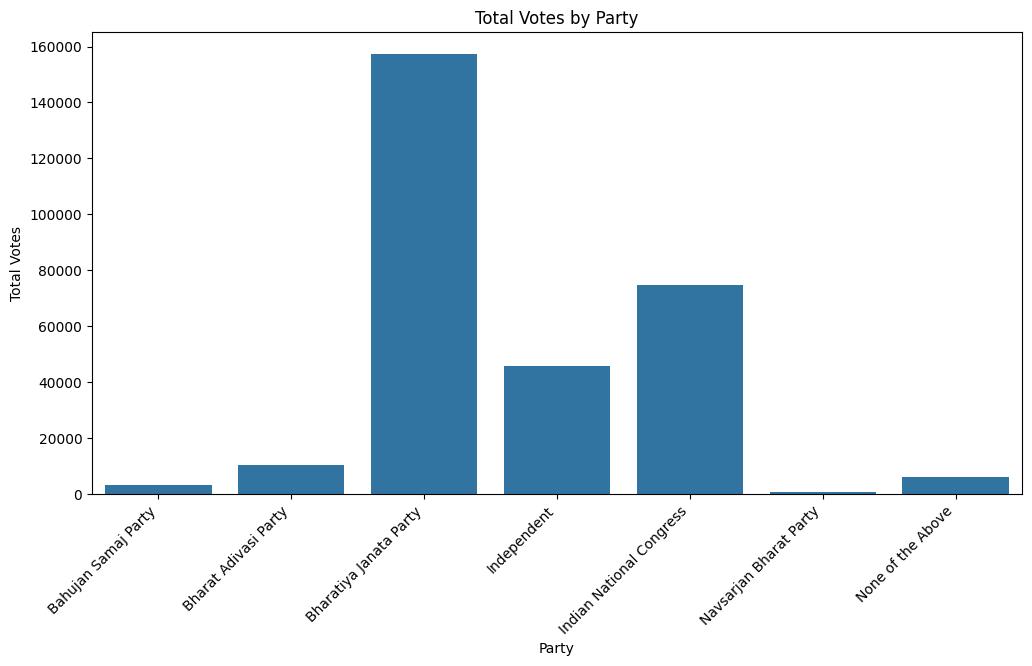

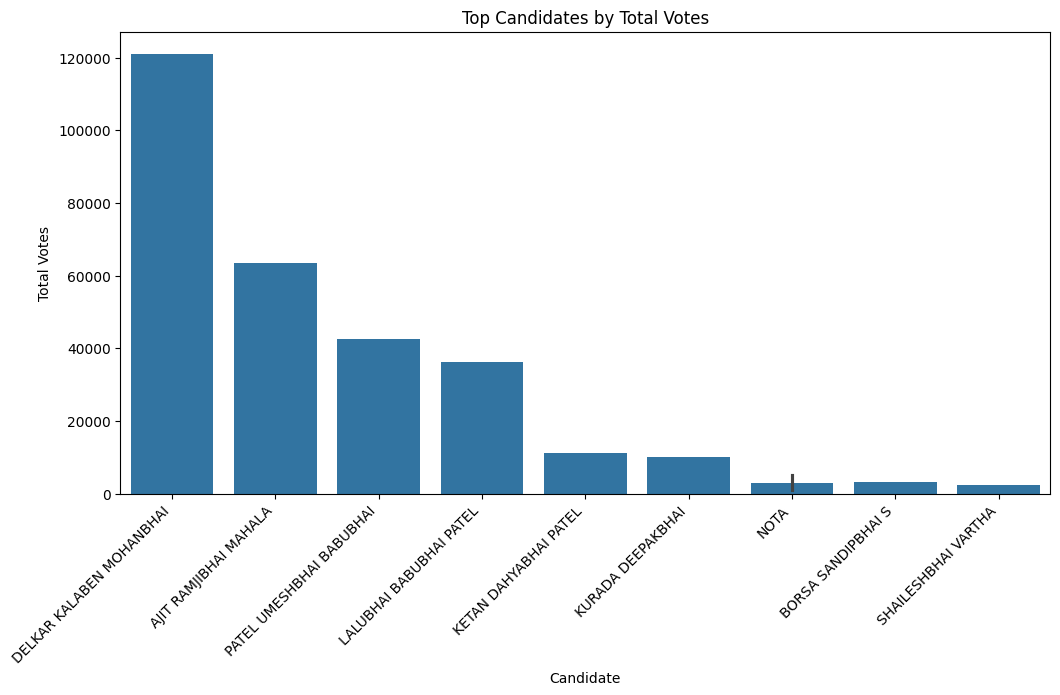

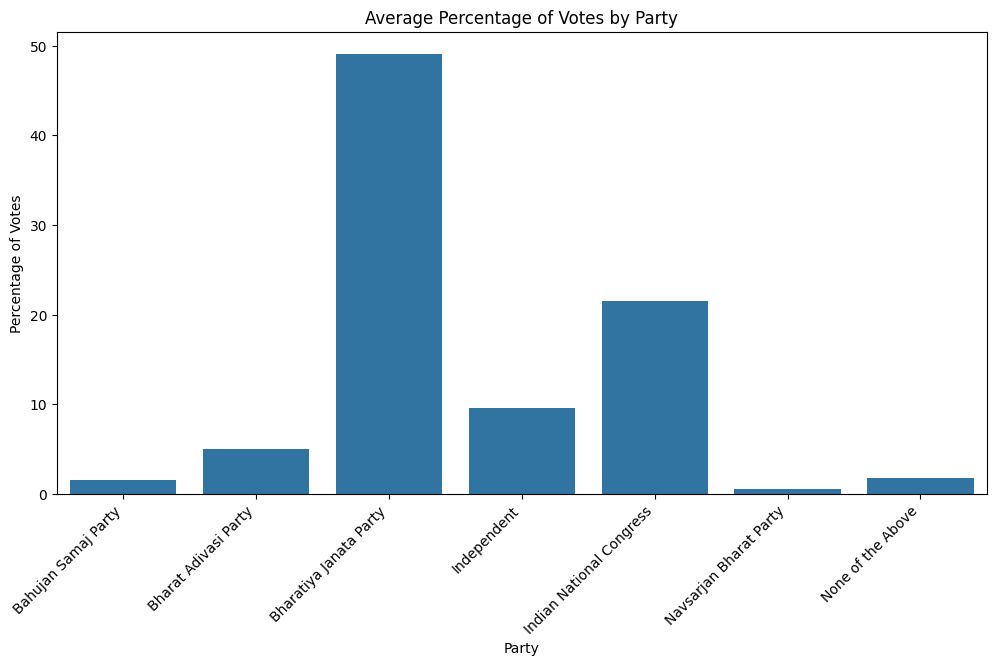


Pivot Table:
                                 mean         sum       count
                         Total Votes Total Votes Total Votes
Party                                                       
Bahujan Samaj Party           3152.0        3152           1
Bharat Adivasi Party         10197.0       10197           1
Bharatiya Janata Party       78686.0      157372           2
Independent                   9171.0       45855           5
Indian National Congress     37374.0       74748           2
Navsarjan Bharat Party         545.0         545           1
None of the Above             3064.5        6129           2

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Function to load and process CSV files
def process_csv_files(folder_path):
    # List all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    all_data = []

    for file in csv_files:
        try:
            # Construct full file path
            file_path = os.path.join(folder_path, file)
            
            # Load the CSV file
            df = pd.read_csv(file_path)
            
            # Print first few rows for debugging
            print(f"Data from {file}:")
            print(df.head())
            
            # Convert all columns to strings to ensure .str accessor works
            df = df.astype(str)
            
            # Clean data
            df.dropna(inplace=True)
            
            # Replace non-numeric values with 0
            df['EVM Votes'] = df['EVM Votes'].str.replace(',', '').replace('-', '0').astype(int)
            df['Postal Votes'] = df['Postal Votes'].str.replace(',', '').replace('-', '0').astype(int)
            df['Total Votes'] = df['Total Votes'].str.replace(',', '').replace('-', '0').astype(int)
            df['Percentage of votes'] = df['Percentage of votes'].str.replace('%', '').replace('-', '0').astype(float)
            
            # Append data to the list
            all_data.append(df)
        except Exception as e:
            print(f"Error processing file {file}: {e}")

    # Concatenate all DataFrames into one
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)

        # Save the combined data to a new CSV file
        combined_df.to_csv(os.path.join(folder_path, 'Combined_Election_Results.csv'), index=False)

        return combined_df
    else:
        print("No data to process.")
        return None

# Function to analyze and visualize data
def analyze_data(combined_df):
    if combined_df is not None:
        # Inspect column names
        print("Column names in combined DataFrame:")
        print(combined_df.columns)

        # Perform Data Analysis and Visualization
        # Basic statistics
        print(combined_df.describe())

        # Distribution of total votes
        plt.figure(figsize=(10, 6))
        sns.histplot(combined_df['Total Votes'], bins=10)
        plt.title('Distribution of Total Votes')
        plt.xlabel('Total Votes')
        plt.ylabel('Frequency')
        plt.show()

        # Party-wise total votes
        party_votes = combined_df.groupby('Party')['Total Votes'].sum().reset_index()
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Party', y='Total Votes', data=party_votes)
        plt.title('Total Votes by Party')
        plt.xlabel('Party')
        plt.ylabel('Total Votes')
        plt.xticks(rotation=45, ha='right')
        plt.show()

        # Top candidates by total votes
        top_candidates = combined_df.sort_values(by='Total Votes', ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Candidate', y='Total Votes', data=top_candidates)
        plt.title('Top Candidates by Total Votes')
        plt.xlabel('Candidate')
        plt.ylabel('Total Votes')
        plt.xticks(rotation=45, ha='right')
        plt.show()

        # Party-wise percentage of votes
        party_percentage = combined_df.groupby('Party')['Percentage of votes'].mean().reset_index()
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Party', y='Percentage of votes', data=party_percentage)
        plt.title('Average Percentage of Votes by Party')
        plt.xlabel('Party')
        plt.ylabel('Percentage of Votes')
        plt.xticks(rotation=45, ha='right')
        plt.show()

        # Pivot Table: Summarize data
        pivot_table = combined_df.pivot_table(index='Party', values='Total Votes', aggfunc=['mean', 'sum', 'count'])
        print("\nPivot Table:\n", pivot_table)

        # Classification: Predicting the 'Party' column
        # Encoding categorical variables
        label_encoders = {}
        categorical_columns = combined_df.select_dtypes(include=[object]).columns
        for column in categorical_columns:
            label_encoders[column] = LabelEncoder()
            combined_df[column] = label_encoders[column].fit_transform(combined_df[column])

        # Splitting data into training and testing sets
        X = combined_df.drop('Party', axis=1)
        y = combined_df['Party']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train a RandomForestClassifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)

        # Predict the results
        y_pred = clf.predict(X_test)

        # Classification report and confusion matrix
        print("\nClassification Report:\n")
        print(classification_report(y_test, y_pred, zero_division=0))

        print("\nConfusion Matrix:\n")
        print(confusion_matrix(y_test, y_pred))

    else:
        print("No data to analyze.")

# Main script execution
if __name__ == "__main__":
    # Folder path containing CSV files for Chandigarh
    folder_path = r'C:\Users\Divija agrawal\Desktop\Loksabha Election 2024 India\State\ddh_dnd_csv'

    # Process CSV files
    combined_df = process_csv_files(folder_path)

    # Analyze and visualize data
    analyze_data(combined_df)
